In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.2 MB/s eta 0:00:00


# Домашнее задание №4. Генетические алгоритмы

В этом домашнем задании тренируемся в использовании модуля DEAP. Ничего нового придумывать не придется, но нужно разобраться, как при помощи него сделать то же самое, что делали в примерах на лекции и семинаре.

## Задание 1

Поколение 10: Лучшее значение функции приспособленности = 1.8506
Поколение 20: Лучшее значение функции приспособленности = 1.8506
Поколение 30: Лучшее значение функции приспособленности = 1.8506
Поколение 40: Лучшее значение функции приспособленности = 1.8506
Поколение 50: Лучшее значение функции приспособленности = 1.8506
Поколение 60: Лучшее значение функции приспособленности = 1.8506
Поколение 70: Лучшее значение функции приспособленности = 1.8506
Поколение 80: Лучшее значение функции приспособленности = 1.8506
Поколение 90: Лучшее значение функции приспособленности = 1.8506
Поколение 100: Лучшее значение функции приспособленности = 1.8506


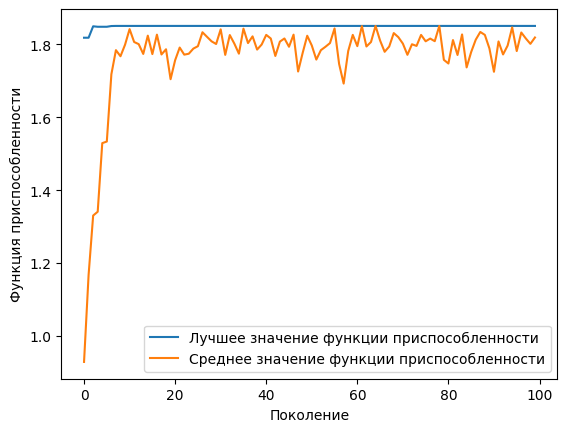

Оптимальное значение x = 0.8512
Максимум функции = 1.8506


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

POPULATION_SIZE = 50
GENERATIONS = 100
CHROMOSOME_LENGTH = 16
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.01

def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1

def decode_chromosome(chromosome):
    max_value = 2**CHROMOSOME_LENGTH - 1
    decimal_value = int(''.join(str(bit) for bit in chromosome), 2)
    x = decimal_value / max_value
    return x

def initialize_population():
    return np.random.randint(0, 2, (POPULATION_SIZE, CHROMOSOME_LENGTH))

def evaluate_fitness(population):
    fitness = []
    for chromosome in population:
        x = decode_chromosome(chromosome)
        fitness.append(fitness_function(x))
    return np.array(fitness)

def selection(population, fitness):
    new_population = []
    for _ in range(POPULATION_SIZE):
        i, j = np.random.randint(0, POPULATION_SIZE, 2)
        if fitness[i] > fitness[j]:
            winner = population[i]
        else:
            winner = population[j]
        new_population.append(winner)
    return np.array(new_population)

def crossover(population):
    new_population = []
    for i in range(0, POPULATION_SIZE, 2):
        parent1 = population[i]
        parent2 = population[i + 1]
        if np.random.rand() < CROSSOVER_RATE:
            point = np.random.randint(1, CHROMOSOME_LENGTH - 1)
            child1 = np.concatenate((parent1[:point], parent2[point:]))
            child2 = np.concatenate((parent2[:point], parent1[point:]))
            new_population.extend([child1, child2])
        else:
            new_population.extend([parent1, parent2])
    return np.array(new_population)

def mutation(population):
    for chromosome in population:
        for i in range(CHROMOSOME_LENGTH):
            if np.random.rand() < MUTATION_RATE:
                chromosome[i] = 1 - chromosome[i]
    return population

population = initialize_population()
best_fitness_history = []
mean_fitness_history = []

for generation in range(GENERATIONS):
    fitness = evaluate_fitness(population)
    best_fitness = np.max(fitness)
    mean_fitness = np.mean(fitness)
    best_fitness_history.append(best_fitness)
    mean_fitness_history.append(mean_fitness)

    if (generation+1) % 10 == 0:
        print(f'Поколение {generation+1}: Лучшее значение функции приспособленности = {best_fitness:.4f}')

    population = selection(population, fitness)
    population = crossover(population)
    population = mutation(population)

plt.plot(best_fitness_history, label='Лучшее значение функции приспособленности')
plt.plot(mean_fitness_history, label='Среднее значение функции приспособленности')
plt.xlabel('Поколение')
plt.ylabel('Функция приспособленности')
plt.legend()
plt.show()

best_index = np.argmax(fitness)
best_chromosome = population[best_index]
best_x = decode_chromosome(best_chromosome)
print(f'Оптимальное значение x = {best_x:.4f}')
print(f'Максимум функции = {fitness_function(best_x):.4f}')

Ниже приведен код с лекции, решающий следующую задачу:

Найти максимум следующей функции:

$ f(x) = x \sin(10 \pi x) + 1$ на интервале: $x \in [0, 1]$

Перепишите код так, чтобы в нем использовалось как можно больше функционала из модуля DEAP.

Поколение 10: Лучшее значение функции приспособленности = 1.8506
Поколение 20: Лучшее значение функции приспособленности = 1.8506
Поколение 30: Лучшее значение функции приспособленности = 1.8506
Поколение 40: Лучшее значение функции приспособленности = 1.8506
Поколение 50: Лучшее значение функции приспособленности = 1.8506
Поколение 60: Лучшее значение функции приспособленности = 1.8506
Поколение 70: Лучшее значение функции приспособленности = 1.8506
Поколение 80: Лучшее значение функции приспособленности = 1.8506
Поколение 90: Лучшее значение функции приспособленности = 1.8506
Поколение 100: Лучшее значение функции приспособленности = 1.8506


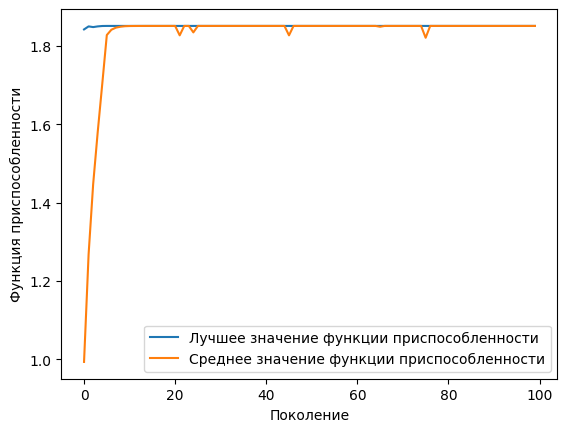

1.8505827778709416
0.8513618677042801


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

POPULATION_SIZE = 50
GENERATIONS = 100
CHROMOSOME_LENGTH = 16
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.01

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1,

def decode_chromosome(chromosome):
    max_value = 2**CHROMOSOME_LENGTH - 1
    decimal_value = int(''.join(str(bit) for bit in chromosome), 2)
    x = decimal_value/max_value
    return x

def initialize_population():
    return [creator.Individual(np.random.randint(0, 2, CHROMOSOME_LENGTH).tolist()) for _ in range(POPULATION_SIZE)]

def evaluate(individual):
    x = decode_chromosome(individual)
    return fitness_function(x)

toolbox = base.Toolbox()
toolbox.register("binary", np.random.randint, 0, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.binary, n=CHROMOSOME_LENGTH)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=MUTATION_RATE)
toolbox.register("select", tools.selTournament, tournsize=2)

population = toolbox.population(n=POPULATION_SIZE)
best_fitness_history = []
mean_fitness_history = []

for generation in range(GENERATIONS):
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit
    best_fitness = max(fitnesses)
    mean_fitness = np.mean(fitnesses)
    best_fitness_history.append(best_fitness)
    mean_fitness_history.append(mean_fitness)
    if (generation + 1) % 10 == 0:
        print(f'Поколение {generation + 1}: Лучшее значение функции приспособленности = {best_fitness[0]:.4f}')
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if np.random.rand() < CROSSOVER_RATE:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
      if np.random.rand() < MUTATION_RATE:
        toolbox.mutate(mutant)
        del mutant.fitness.values
    population[:] = offspring

plt.plot(best_fitness_history, label='Лучшее значение функции приспособленности')
plt.plot(mean_fitness_history, label='Среднее значение функции приспособленности')
plt.xlabel('Поколение')
plt.ylabel('Функция приспособленности')
plt.legend()
plt.show()

best_individual = tools.selBest(population, k=1)[0]
best_fitness = best_individual.fitness.values[0]
print(best_fitness)
print(decode_chromosome(best_individual))

## Задание 2

Ниже приведен код с семинара, решающий следующую задачу:

**Задание**:
Двое нашли клад, в котором находятся бриллианты разного размера (и, соответственно, разной цены). Им нужно разделить сокровище на две части таким образом, чтобы разница в цене была равна 0 (или минимальна).

**Формальное определение**:
У нас есть множество чисел $S$. Нам нужно разделить его на два подмножества $S_1$ и $S_2$, так что $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ и $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

Для начала определим множество $S$:

[2517 6648  132 2607 1357 1136 7129  542 3615  706 8246 1257 3111 2059
 8797 1949 2966 5657 3101 6434 3188 1739  685 2510 4954 2096 2619 2113
 9698 2117 4492 4105 3213 9691 2721 3267 7911 7573 6030 1390 6717 2930
 9153 2051 6410 3917 4260 4464 6624 9208 7251 1696 9986 5114   10 8876
 9422 2704 1578 4373 4147 6985 5176  464 1531 3970 7964 5846 4885 3634
 1106 7753  242 8548 5335 4073 4847 9341 3263 5792 4349 2447 2984 2198
  679 3237 2005 2340 8015 6560 7953 9151 8898 1779   85 6460 9603 2414
 5068  548 2242 3216 5725 2608 8839 3921 2022 4409 7097 6506 6589 1262
  128 4432 1201 3178 9112 6236 4890 6190 3138 2740 9114 8977 4180 5397
 6961 4746 7821  722 3201 7923 6289 1991 5592 2086 3930 2957 9452 8744
 5521 8313 6219 9204 9502 8566 2610 6970 4327 5150 2737 1416 2204 6350
 8042 9965 1607 1317 6798 1459 1460 8109  766 7651 1151 6294 9785 2942
 6816 1210 6921 9891 9971 5788  621  893 6395 4371 5059 9685 3099 4791
 7264 4743 7272 3623 4928 5569  264 4619 6288 9695 8693 5746 4045 7642
 4421 

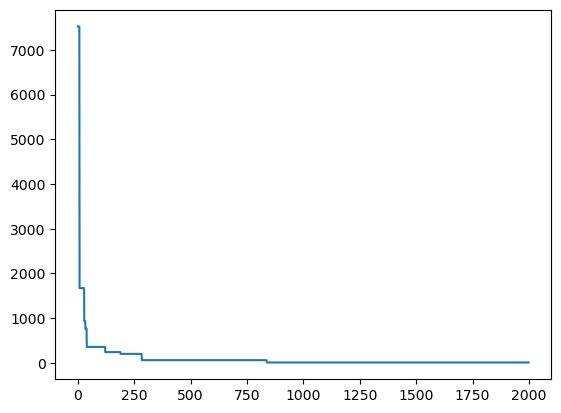

In [ ]:
import random

N = 200
S = np.array([random.randint(1, 10000) for _ in range(N)])
print(S)

def generate(S):
    return np.array([random.randint(0, 1) for _ in S])

def fit(B, S = S):
    c1 = (B * S).sum()
    c2 = ((1 - B) * S).sum()
    return abs(c1 - c2)

def mutate(b):
    x = b.copy()
    i = random.randint(0, len(b) - 1)
    x[i] = 1 - x[i]
    return x

def xover(b1, b2):
    x = generate(b1)
    return b1 * x + b2 * (1 - x)

pop_size = 30
P = [generate(S) for _ in range(pop_size)]

def evolve(P, S = S, n = 2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f == 0:
            break
        if random.randint(1, 10) < 3:
            i = random.randint(0, len(P) - 1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0, len(P)-1)
            j = random.randint(0, len(P)-1)
            b = xover(P[i], P[j])
            if fit(b) < fit(P[i]):
                P[i] = b
            elif fit(b) < fit(P[j]):
                P[j] = b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i], res)

(s, hist) = evolve(P)

print(s, fit(s))
plt.plot(hist)
plt.show()

Перепишите код так, чтобы в нем использовалось как можно больше функционала из модуля DEAP.

[ 4299  9997  1430  8000  3690  7900  3366  8643   880  5925  2967  1090
  2882  4141  9850  8046  8591  2207  8371  8692   559  5562  1629  6885
   561  5793  1463  2513  9141  2820   450  9455  2540  9456  5365  2052
  8602  6161  6430  6576  2654  3054  3371  4877   364  8172  1328  9321
  3617  6449  9543  9388  3393  8564  3023  3375  4184  9895  9278  9407
  7363  6764  3111  3836   685  5294  2017  2692  8592  8403  9238  8239
  4354  2817  5394  2198  1903  9446  3168  5666  3278  2775  5544  5460
  3505  1895  1832  2184  6431  4371  8798  1763  7411   279  9849  7431
  8178  7265  3062  8151  5633  1790  6835  9848  1641  4338  8327  2450
  8600  2068  3467  3697  1525  7038   724   668  9975  9602  9392  2784
  6956   360  7925  2196  1991  2745  6566  2762  5855   366  4117  5592
   671  9454  6717  1336   913  2585   348  4605  2469  9001  1714    62
  5883  7632  7710  4279  7185  8108  4757  3483  3036   739  9140  8505
  2709  9960  5403  9458  8326  3184  8386   832  9

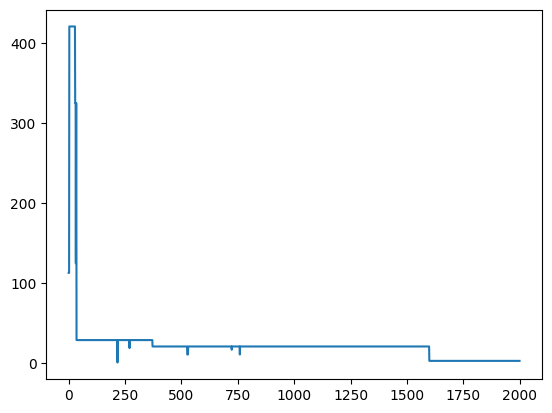

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base
from deap import creator
from deap import tools

N = 200
pop_size = 30
num_generations = 2000
S = np.array([random.randint(1, 10000) for _ in range(N)])
print(S)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

def generate():
    return creator.Individual(np.random.randint(0, 2, N).tolist())

def fit(individual):
    individual_np = np.array(individual)
    c1 = (individual_np * S).sum()
    c2 = ((1 - individual_np) * S).sum()
    return abs(c1 - c2),

toolbox = base.Toolbox()
toolbox.register("individual", generate)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fit)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=pop_size)
fitnesses = list(map(toolbox.evaluate, population))

for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

hist = []
for generation in range(num_generations):
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.7:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    fitnesses = list(map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
    population[:] = offspring
    best_fitness = min(fitnesses)
    hist.append(best_fitness[0])
    if best_fitness[0] == 0:
        break

best_individual = tools.selBest(population, k=1)[0]
best_fitness = best_individual.fitness.values[0]
print(best_individual, best_fitness)
plt.plot(hist)
plt.show()